# E4-2 Predicting House Prices by Regression
This example demonstrates machine learning by regression.
We will be using three regression algorithms:
- linear regression
- multiple linear regression
- polynomial regression

The dataset comes from King County, USA (kaggle.com).

## Step 1: Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

## Step 2: Data

In [2]:
# read the data
df = pd.read_csv("kc_house_data.csv")

In [3]:
# get idea of the look
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# convert sqft to sqm
df['sqm'] = df['sqft_living']/10.764

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqm
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,193.227400
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,85.325241
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,26.941657
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,132.571535
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,177.443330
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,236.900780
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1257.896693


In [7]:
# see which are the attribute labels
list(df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqm']

In [8]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
# get idea of basic statistical parameters for each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqm
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,193.227400
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,85.325241
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,26.941657
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,132.571535
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,177.443330
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,236.900780
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1257.896693


In [10]:
# to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqm
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,...,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46,193.23
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,...,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18,85.33
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,26.94
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,...,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,132.57
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,...,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,177.44
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,...,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,236.90
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,1257.90


In [12]:
# to check null values in data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqm              0
dtype: int64

Above representation shows that our data does not have any null values

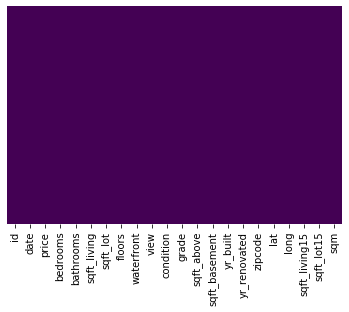

In [13]:
# same visualized
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

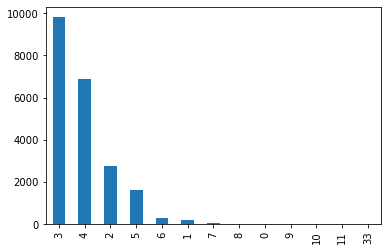

In [14]:
df['bedrooms'].value_counts().plot(kind='bar')

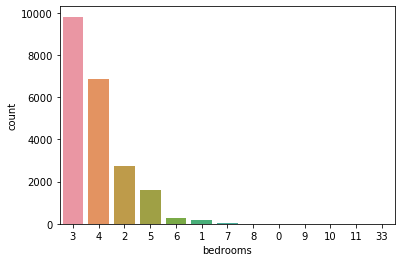

In [15]:
# same, with anmother plot lib
sns.countplot(df.bedrooms, order = df['bedrooms'].value_counts().index)

In [16]:
# Did the size matter?
ranges = [0,100,200,300,400,500,600,700,800, 900, 1000, 1100, 1200, 1300] 
df['sqm'].groupby([(pd.cut(df.sqm, ranges))]).count()

sqm
(0, 100]         2077
(100, 200]      11066
(200, 300]       6212
(300, 400]       1746
(400, 500]        373
(500, 600]         94
(600, 700]         30
(700, 800]          8
(800, 900]          3
(900, 1000]         2
(1000, 1100]        0
(1100, 1200]        1
(1200, 1300]        1
Name: sqm, dtype: int64

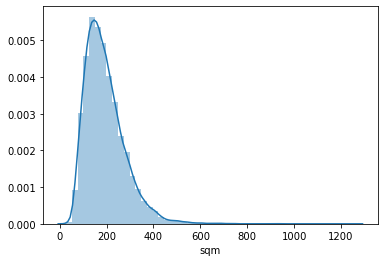

In [17]:
sns.distplot(df['sqm'],  label='sqm_living', norm_hist=True)  

In [18]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

163 houses which have a view to a waterfront

In [19]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

19489 flats have not been viewed at all, whereas 319 flats have been viewed 4 times

### Investigate the inter-dependencies of the columns
Create a correlation matrix to see which features determine the output at most, as well as whether there are some correlated features. <br>
If two features are correlated, only one of them can represent both.

In [20]:
corr_matrix = df.corr()
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqm
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,...,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14,-0.01
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,...,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,0.70
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,...,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03,0.58
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,...,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.75
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,...,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,1.00
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,...,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,0.17
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,...,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,0.35
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,...,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.10
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,...,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.28
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,...,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,-0.06


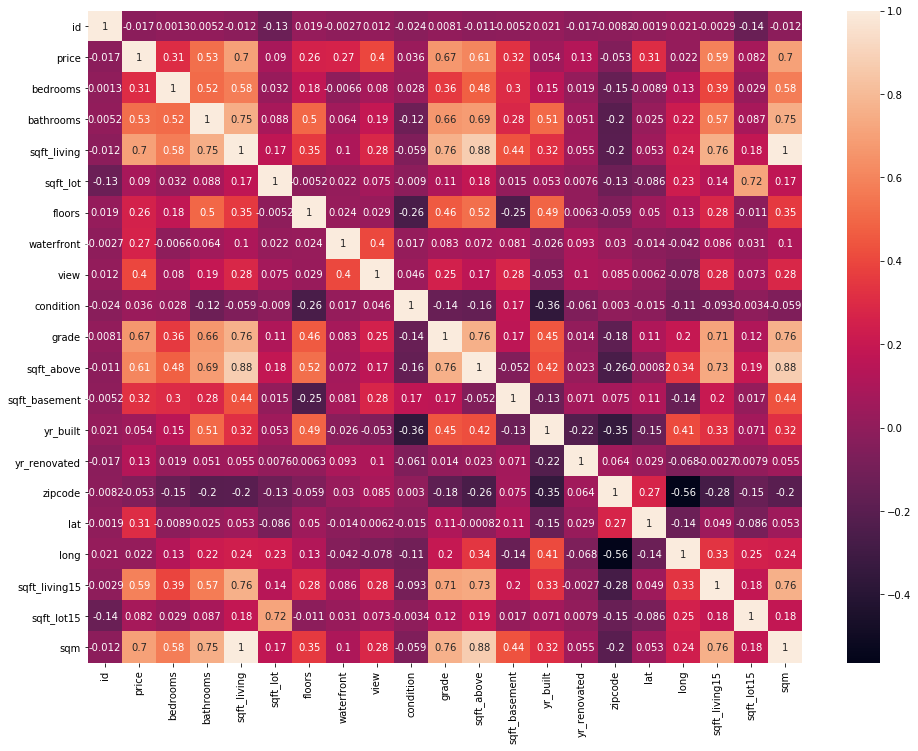

In [21]:
# plot the matrix as a heat map
plt.subplots(figsize = (16, 12))
sns.heatmap(corr_matrix, annot=True)

## Step 3: Train a Model

## 3.1 Linear Regression

In [22]:
# split the set into subsets for training and testing
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)

In [23]:
# We chose the living space in sqm as an input and price as an output
# reshape(-1,1) reshapes the column in one-dimensional array (1 column) and unknown number of rows (-1)
X_train = np.array(train_data['sqm']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1, 1)
X_test = np.array(test_data['sqm']).reshape(-1,1)
y_test = np.array(test_data['price']).reshape(-1, 1)

In [24]:
y_train

array([[450000.],
       [599950.],
       [210000.],
       ...,
       [349950.],
       [510000.],
       [286000.]])

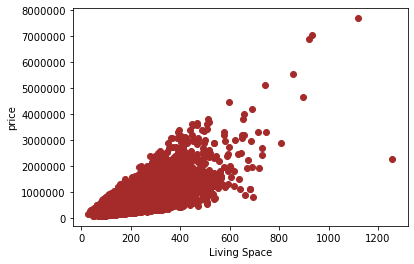

In [25]:
# plot the train set
plt.xlabel('Living Space')
plt.ylabel('price')

plt.scatter(X_train, y_train, color='brown')

plt.show()

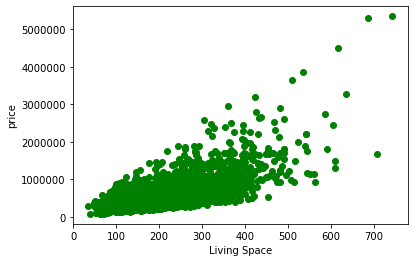

In [26]:
# plot the test set
plt.xlabel('Living Space')
plt.ylabel('price')

plt.scatter(X_test, y_test, color='green')

plt.show()

In [27]:
# Create regressor
regressor = linear_model.LinearRegression()

In [28]:
# Train model
model = regressor.fit(X_train, y_train)

## Step 4: Test the Model

In [29]:
# make prediction
y_predicted = regressor.predict(X_test)

In [30]:
y_predicted

array([[ 404359.0930146 ],
       [1225697.32524207],
       [ 853131.52918013],
       ...,
       [ 652736.29038923],
       [1200295.11187421],
       [ 404359.0930146 ]])

In [31]:
y_test

array([[ 525000.],
       [1870000.],
       [ 750000.],
       ...,
       [ 979700.],
       [1315000.],
       [ 280000.]])

No handles with labels found to put in legend.


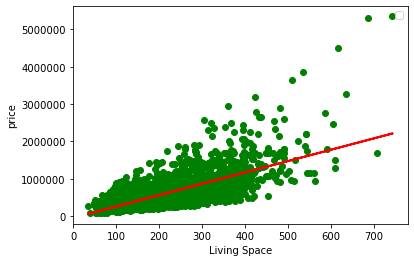

In [32]:
# plot the prediction
plt.xlabel('Living Space')
plt.ylabel('price')
plt.legend()

plt.scatter(X_test, y_test, color='green', label = 'test data')
plt.plot(X_test, y_predicted, color='red', linewidth=2, label= 'predicted regression line')

# y_predicted, X_test, 
plt.show()

In [33]:
# Compute the coeficients a and b
# so the formula would be y = ax + b
a = regressor.coef_
b = regressor.intercept_
print('Coefficient a: ', a)
print('Intercept b: ', b)

Coefficient a:  [[3038.1047188]]
Intercept b:  [-47235.8113029]


In [34]:
# Compute performance metrics
print("Linear Regressor Performance")

# The mean squared error
print("Mean squared error: %.2f" % sm.mean_squared_error(y_test, y_predicted))

# Explained variance score: 1 is perfect prediction
print('Explained variance score ', round(sm.explained_variance_score(y_test, y_predicted), 2))
print('R-squared (training) ', round(regressor.score(X_train, y_train), 2))
print('R-squared (testing) ',  round(regressor.score(X_test, y_test), 2))
print('R2 score: %.2f' % sm.r2_score(y_test, y_predicted))

Linear Regressor Performance
Mean squared error: 64662971143.35
Explained variance score  0.5
R-squared (training)  0.49
R-squared (testing)  0.5
R2 score: 0.50


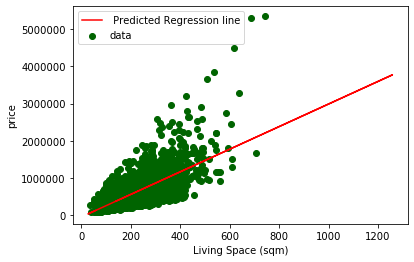

In [35]:
plt.scatter(X_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(X_train, regressor.predict(X_train), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqm)')
plt.ylabel('price')
plt.legend()

## 3.2 Multiple Regression
This is a linear regression, where more input features participate.<br>
_y = c + a1 x X1 + a2 x X2 + a3 x X3 + a4 x X4 + a5 x X5 + a6 x X6_

In [36]:
# select features
features1 = ['bedrooms','bathrooms','grade']
regressor1 = linear_model.LinearRegression()

In [37]:
regressor1.fit(train_data[features1],train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_prediction = regressor1.predict(test_data[features1])

In [39]:
# Compute performance metrics
print("Multiple Regression Performance")

# The coefficients
print('Coefficients ai (one for each input variable/feature): ', regressor1.coef_)
print('Intercept c: ', regressor1.intercept_)

Multiple Regression Performance
Coefficients ai (one for each input variable/feature):  [ 15210.80562176  62961.68806884 177628.88000355]
Intercept c:  -1004105.4061426056


In [40]:
# The mean squared error
print("Mean squared error: %.2f" % sm.mean_squared_error(y_test, y_prediction))

# Explained variance score: 1 is perfect prediction
print('R-squared (training) ', round(regressor1.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(regressor1.score(test_data[features1], test_data['price']), 3))
print('Explained variance score ', round(sm.explained_variance_score(y_test, y_prediction), 2))
print('R2 score: %.2f' % sm.r2_score(y_test, y_prediction))

Mean squared error: 68135964447.78
R-squared (training)  0.456
R-squared (testing)  0.469
Explained variance score  0.47
R2 score: 0.47


__Exercise__: Try another combination of features

## 3.3 Polynomial Regression 
It is a form of regression, in which the relationship between the independent variable __X__ and the dependent variable __y__ is modelled as an __n-th degree__ polynomial in x.<br>
_y = a + b1 x X + b2 x X^2 + ... + bn x X^n_

In [41]:
y_train_poly = np.array(train_data['price']).reshape(-1, 1)

In [42]:
# We chose the living space in sqm as an input and price as an output
# reshape(-1,1) reshapes the column in one-dimensional array (1 column) and unknown number of rows (-1)
X_train = np.array(train_data['sqm']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1, 1)
X_test = np.array(test_data['sqm']).reshape(-1,1)
y_test = np.array(test_data['price']).reshape(-1, 1)

In [43]:
# polynimial regressi0n transforms the features of X from [x_1, x_2]
# to [1, x_1, x_2, x_1^2, x_1 x_2, x_2^2] 
# so now they can be used in a linear regression model
# features2 = ['sqm','waterfront','yr_built']
features2 = 'sqm'
train_data_feature = train_data[features2].values.reshape(-1,1)
test_data_feature = test_data[features2].values.reshape(-1,1)
#y_train_data_reshaped = y_train.values.reshape(-1,1)
# train_data['price']

In [44]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_regression_model(degree):
    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly =  poly_features.fit_transform(X_test)
  
  # fit the transformed features to Linear Regression
  model = linear_model.LinearRegression()
  poly_model = model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predicted = poly_model.predict(X_test_poly)

In [45]:
# execute
polynomial_regression_model(2)

In [46]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(train_data_feature)
X_test_poly = poly.fit_transform(test_data_feature)
y_train_poly = np.array(train_data['price']).reshape(-1, 1)
y_test_poly = np.array(test_data['price']).reshape(-1, 1)
#poly.fit(X_train_poly, train_data['price'].values.reshape(-1,1))
# poly.fit(X_train_poly, y_train)

In [47]:
# use linear regression
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# linear prediction with poly fit data
y_train_predicted = model.predict(X_train_poly)
y_test_predicted = model.predict(X_test_poly)  

In [49]:
# y_train_predicted
y_test_predicted

array([[ 406665.217325  ],
       [1285858.74053772],
       [ 810699.72613895],
       ...,
       [ 607552.99467943],
       [1249434.52022227],
       [ 406665.217325  ]])

In [50]:
# RMSE (Root mean squared error) answers the question: "How similar, on average, are the numbers in list1 to list2?"  
# evaluating the model on training dataset
rmse_train = np.sqrt(sm.mean_squared_error(y_train, y_train_predicted))
r2_train = sm.r2_score(y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(sm.mean_squared_error(y_test, y_test_predicted))
r2_test = sm.r2_score(y_test, y_test_predicted)

In [51]:
# print the measures - positive?
print('RMSE (training) ',rmse_train)
print('RMSE (testing) ',rmse_test)

RMSE (training)  253043.96933499014
RMSE (testing)  242567.62509158094


In [52]:
# Compute other performance metrics
print("Multiple Regression Performance")

# The coefficients
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

# Explained variance score: 1 is perfect prediction
print('R-squared (training) ', round(r2_train, 3))
print('R-squared (testing) ', round(r2_test, 3))

Multiple Regression Performance
Coefficient:  [[  0.         859.61760316   4.21485833]]
Intercept:  [185761.54845371]
R-squared (training)  0.53
R-squared (testing)  0.542


In [53]:
# compare 
print('Explained variance score ', round(sm.explained_variance_score(y_train, y_train_predicted), 3))
print('Explained variance score ', round(sm.explained_variance_score(y_test, y_test_predicted), 3))

Explained variance score  0.53
Explained variance score  0.542


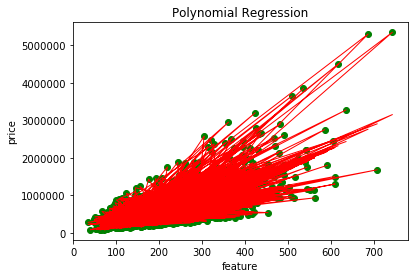

In [54]:
# Plot
plt.title('Polynomial Regression') 
plt.xlabel('feature')
plt.ylabel('price')
plt.scatter(test_data_feature, y_test,  color = 'green', label = 'test data') 
  
#plt.plot(X_plot_poly,model.predict(X_plot_poly),'-r')
plt.plot(test_data_feature, y_test_poly, '-r', color='red', linewidth=1)
plt.plot(test_data_feature, y_test_predicted, '-r', color='red', linewidth=1)
plt.show()

## Reference
https://www.kaggle.com/aniketg11/predicting-house-prices-through-regression/notebook <br>
https://www.dataquest.io/blog/understanding-regression-error-metrics/ <br>